## Configuration

Specify the path to your CSV file and whether it's a full or minimal export.

In [1]:
# Configuration Parameters
CSV_FILE_PATH = r"results_20251203_184828\all_games_full.csv"  # Update this path
CSV_TYPE = "full"  # Options: "full" or "minimal"
INCLUDE_OT_GAMES = False  # Set to False to exclude overtime games

## Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Set visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 8)

print("Libraries imported successfully")

Libraries imported successfully


## Load and Prepare Data

In [3]:
# Load CSV data
df = pd.read_csv(CSV_FILE_PATH, sep=';')

print(f"Loaded {len(df)} rows from {CSV_FILE_PATH}")
print(f"\nColumns available: {list(df.columns)}")
print(f"\nNumber of unique games: {df['game_id'].nunique()}")
print(f"\nFirst few rows:")
df.head()

Loaded 2781434 rows from results_20251203_184828\all_games_full.csv

Columns available: ['round_number', 'is_t1_ct', 'is_t1_winner', 'is_ot', 'is_ct_winner', 'outcome_reason_code', 'outcome_ct_wins', 'outcome_bomb_planted', 'outcome_ct_survivors', 'outcome_t_survivors', 'csf', 'csf_key', 'ct_equipment_share_per_player', 't_equipment_share_per_player', 'ct_equipment_per_player', 't_equipment_per_player', 'rng_csf', 'rng_round_outcome', 'rng_bombplant', 'rng_survivors_ct', 'rng_survivors_t', 'rng_equipment_ct', 'rng_equipment_t', 't1_funds', 't1_funds_start', 't1_earned', 't1_rs_eq_value', 't1_fte_eq_value', 't1_re_eq_value', 't1_survivors', 't1_score_start', 't1_score_end', 't1_consecutive_loss', 't1_consecutive_wins', 't1_loss_bonus_level', 't1_spent', 't2_funds', 't2_funds_start', 't2_earned', 't2_rs_eq_value', 't2_fte_eq_value', 't2_re_eq_value', 't2_survivors', 't2_score_start', 't2_score_end', 't2_consecutive_loss', 't2_consecutive_wins', 't2_loss_bonus_level', 't2_spent', 't1_name

,round_number,is_t1_ct,is_t1_winner,is_ot,is_ct_winner,outcome_reason_code,outcome_ct_wins,outcome_bomb_planted,outcome_ct_survivors,outcome_t_survivors,...,t2_score_end,t2_consecutive_loss,t2_consecutive_wins,t2_loss_bonus_level,t2_spent,t1_name,t1_strategy,t2_name,t2_strategy,game_id
0,1,True,True,False,True,4,True,False,0,0,...,0,1,0,2,4000.0,Team A,all_in,Team B,min_max,sim_1_20251203_184828_DPE1-2_4048
1,2,True,True,False,True,3,True,True,0,0,...,0,2,0,3,11000.0,Team A,all_in,Team B,min_max,sim_1_20251203_184828_DPE1-2_4048
2,3,True,True,False,True,4,True,False,0,0,...,0,3,0,4,17800.0,Team A,all_in,Team B,min_max,sim_1_20251203_184828_DPE1-2_4048
3,4,True,True,False,True,4,True,False,0,0,...,0,4,0,4,0.0,Team A,all_in,Team B,min_max,sim_1_20251203_184828_DPE1-2_4048
4,5,True,True,False,True,4,True,False,0,0,...,0,5,0,4,0.0,Team A,all_in,Team B,min_max,sim_1_20251203_184828_DPE1-2_4048


## Filter Data

In [4]:
# Apply OT filter
if not INCLUDE_OT_GAMES:
    df_filtered = df[df['is_ot'] == False].copy()
    print(f"Filtered out OT games. Remaining rows: {len(df_filtered)}")
else:
    df_filtered = df.copy()
    print(f"Including all games (with OT). Total rows: {len(df_filtered)}")

print(f"\nGames after filter: {df_filtered['game_id'].nunique()}")
print(f"Rounds with OT: {df_filtered['is_ot'].sum()}")
print(f"Rounds without OT: {(~df_filtered['is_ot']).sum()}")

Filtered out OT games. Remaining rows: 2703459

Games after filter: 100000
Rounds with OT: 0
Rounds without OT: 2703459


## Data Summary Statistics

## Round Outcome & RNG Analysis

Analyzing the relationship between round outcomes (outcome_reason_code, outcome_ct_wins, outcome_bomb_planted, outcome_ct_survivors, outcome_t_survivors, csf, csf_key) and their corresponding RNG values (rng_csf, rng_round_outcome, rng_bombplant, rng_survivors_ct, rng_survivors_t).

In [5]:
# Check which columns are available (full vs minimal export)
outcome_cols = ['outcome_reason_code', 'outcome_ct_wins', 'outcome_bomb_planted', 
                'outcome_ct_survivors', 'outcome_t_survivors', 'csf', 'csf_key']
rng_cols = ['rng_csf', 'rng_round_outcome', 'rng_bombplant', 
            'rng_survivors_ct', 'rng_survivors_t']

available_outcome_cols = [col for col in outcome_cols if col in df_filtered.columns]
available_rng_cols = [col for col in rng_cols if col in df_filtered.columns]

print(f"Available outcome columns: {available_outcome_cols}")
print(f"Available RNG columns: {available_rng_cols}")

# Create working dataframe for RNG analysis
if len(available_outcome_cols) > 0 and len(available_rng_cols) > 0:
    df_rng = df_filtered[['round_number', 'game_id'] + available_outcome_cols + available_rng_cols].copy()
    print(f"\nRNG analysis dataframe created with {len(df_rng)} rows")
    print(f"\nFirst few rows:")
    display(df_rng.head())
else:
    print("\nWARNING: Not all required columns available. Use full CSV export (mode 1 or 2) for complete RNG analysis.")
    df_rng = None

Available outcome columns: ['outcome_reason_code', 'outcome_ct_wins', 'outcome_bomb_planted', 'outcome_ct_survivors', 'outcome_t_survivors', 'csf', 'csf_key']
Available RNG columns: ['rng_csf', 'rng_round_outcome', 'rng_bombplant', 'rng_survivors_ct', 'rng_survivors_t']



RNG analysis dataframe created with 2703459 rows

First few rows:


,round_number,game_id,outcome_reason_code,outcome_ct_wins,outcome_bomb_planted,outcome_ct_survivors,outcome_t_survivors,csf,csf_key,rng_csf,rng_round_outcome,rng_bombplant,rng_survivors_ct,rng_survivors_t
0,1,sim_1_20251203_184828_DPE1-2_4048,4,True,False,0,0,0.500000,50,0.021261,51.202419,0.0,0.0,0.0
1,2,sim_1_20251203_184828_DPE1-2_4048,3,True,True,0,0,0.618790,62,0.193378,7.457480,0.0,0.0,0.0
2,3,sim_1_20251203_184828_DPE1-2_4048,4,True,False,0,0,0.520819,52,0.071526,85.718175,0.0,0.0,0.0
3,4,sim_1_20251203_184828_DPE1-2_4048,4,True,False,0,0,0.960105,96,0.869323,35.316474,0.0,0.0,0.0
4,5,sim_1_20251203_184828_DPE1-2_4048,4,True,False,0,0,0.960105,96,0.918173,99.601416,0.0,0.0,0.0


### 1. Round Outcome RNG Distribution by CSF Key

Analyzing rng_round_outcome grouped by csf_key to understand how different combat strength factors influence round outcome randomness.

In [6]:
if df_rng is not None and 'csf_key' in df_rng.columns and 'rng_round_outcome' in df_rng.columns:
    # Group by CSF key and calculate distributions
    rng_outcome_by_csf = df_rng.groupby('csf_key')['rng_round_outcome'].agg([
        ('count', 'count'),
        ('mean', 'mean'),
        ('std', 'std'),
        ('min', 'min'),
        ('q25', lambda x: x.quantile(0.25)),
        ('median', 'median'),
        ('q75', lambda x: x.quantile(0.75)),
        ('max', 'max')
    ]).reset_index()
    
    print("="*80)
    print("RNG ROUND OUTCOME DISTRIBUTION BY CSF KEY")
    print("="*80)
    print(rng_outcome_by_csf.to_string(index=False))
    print("="*80)
    
    # Also get CSF value distribution by key
    if 'csf' in df_rng.columns:
        csf_by_key = df_rng.groupby('csf_key')['csf'].agg([
            ('mean', 'mean'),
            ('std', 'std'),
            ('min', 'min'),
            ('max', 'max')
        ]).reset_index()
        print("\nCSF VALUE DISTRIBUTION BY CSF KEY")
        print("="*80)
        print(csf_by_key.to_string(index=False))
        print("="*80)
else:
    print("Skipping: Required columns not available in this CSV export mode.")

RNG ROUND OUTCOME DISTRIBUTION BY CSF KEY
 csf_key  count      mean       std       min       q25    median       q75       max
       3   7299 50.427214 28.875974  0.008113 25.380823 50.579536 75.392391 99.976811
       4 223277 49.957008 28.883697  0.000017 24.852608 50.006659 74.903021 99.999877
       5  21619 49.816390 28.860311  0.004501 24.795190 49.724063 74.752038 99.997965
       6  13199 50.087464 28.710833  0.020021 25.489970 50.025667 74.873103 99.999431
       8  19371 49.889563 28.761940  0.002573 25.147022 49.564986 74.527101 99.998700
      11      7 50.585425 32.669853 10.294169 27.651543 36.580813 80.789231 90.341442
      12    188 54.906863 29.198837  0.397130 31.742103 54.498613 79.532023 99.633432
      13    393 50.476762 29.675612  0.013538 25.886258 49.543011 75.745156 99.974584
      14    446 51.774317 27.767607  0.220987 29.975862 50.891564 74.854332 99.877933
      15   2380 50.127772 28.853673  0.032869 25.025932 50.138077 75.200158 99.964823
      16   1

C:\Users\peter\AppData\Local\Temp\ipykernel_37528\306922385.py:49: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax4.set_xticklabels(bin_labels, rotation=45)
C:\Users\peter\AppData\Local\Temp\ipykernel_37528\306922385.py:55: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\Users\peter\AppData\Local\Temp\ipykernel_37528\306922385.py:55: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\Users\peter\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\peter\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas

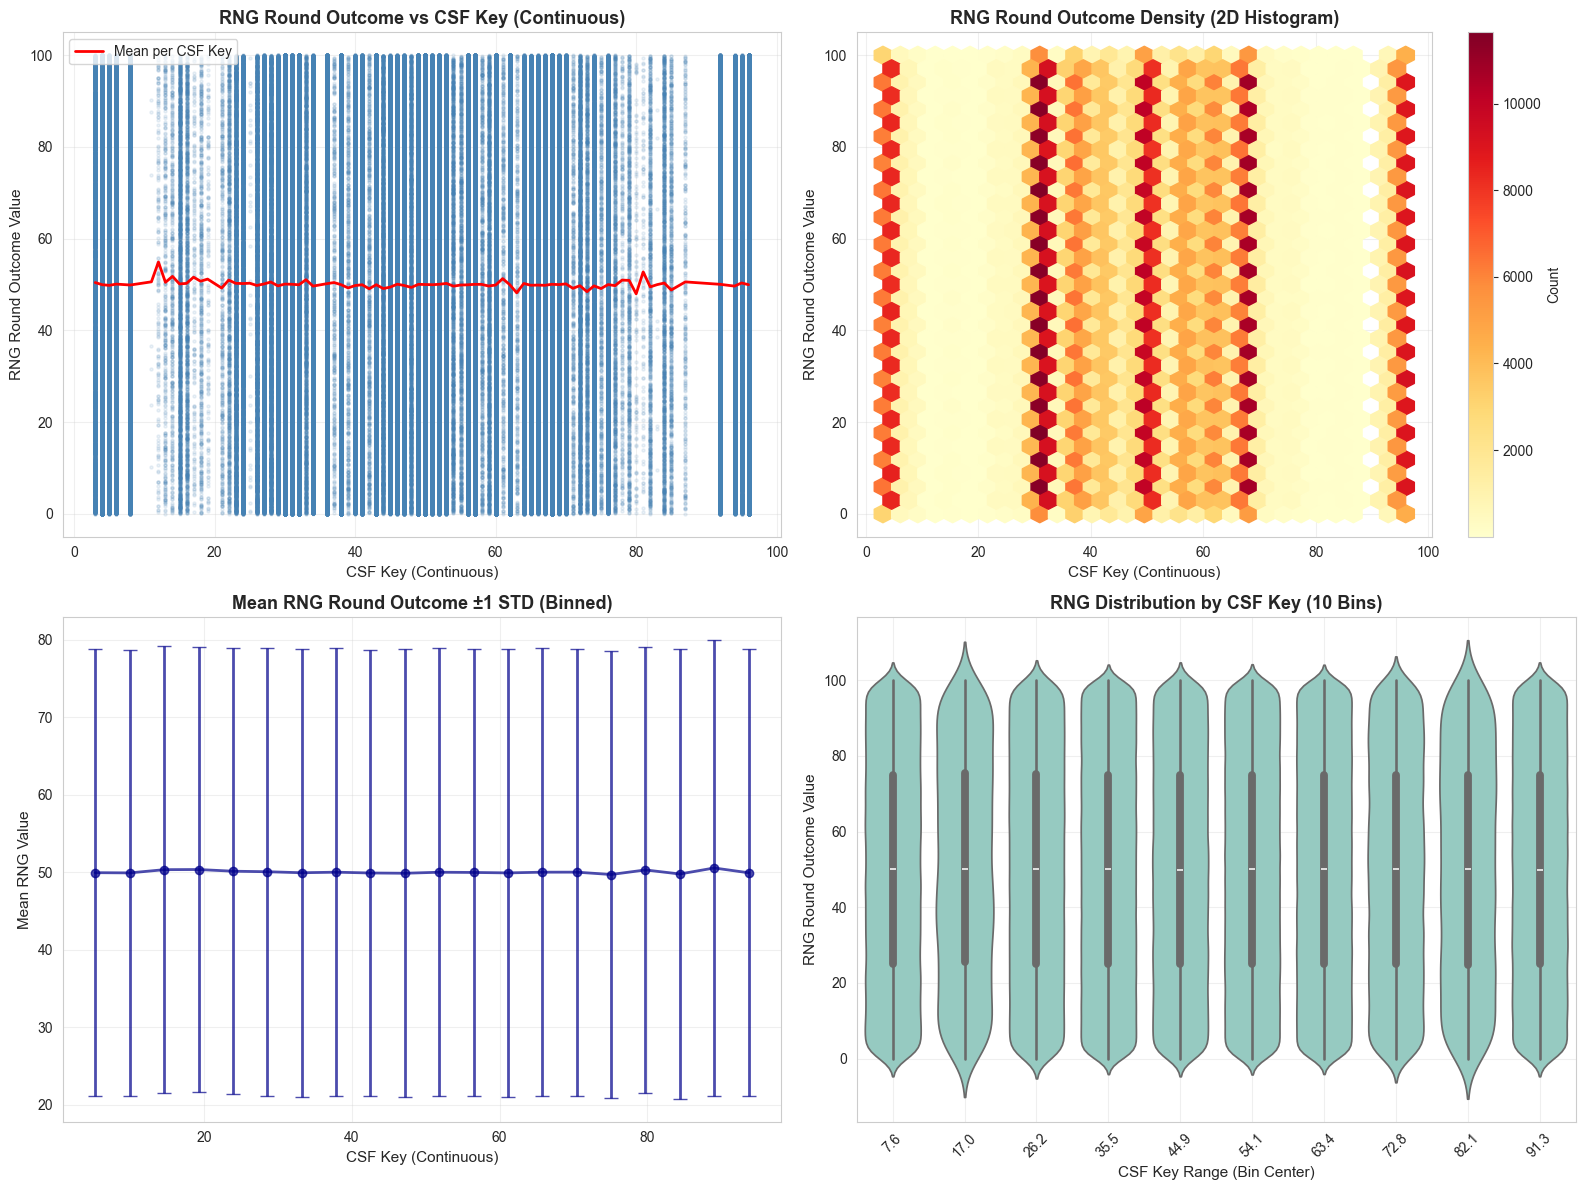

In [16]:
# Visualization: RNG Round Outcome by CSF Key (CONTINUOUS)
if df_rng is not None and 'csf_key' in df_rng.columns and 'rng_round_outcome' in df_rng.columns:
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # 1. Scatter plot with mean trend line
    ax1 = axes[0, 0]
    ax1.scatter(df_rng['csf_key'], df_rng['rng_round_outcome'], alpha=0.1, s=5, color='steelblue')
    # Calculate mean per CSF key for trend
    csf_means = df_rng.groupby('csf_key')['rng_round_outcome'].mean()
    ax1.plot(csf_means.index, csf_means.values, color='red', linewidth=2, label='Mean per CSF Key')
    ax1.set_title('RNG Round Outcome vs CSF Key (Continuous)', fontsize=13, fontweight='bold')
    ax1.set_xlabel('CSF Key (Continuous)', fontsize=11)
    ax1.set_ylabel('RNG Round Outcome Value', fontsize=11)
    ax1.legend()
    ax1.grid(alpha=0.3)
    
    # 2. Hexbin density plot
    ax2 = axes[0, 1]
    hexbin = ax2.hexbin(df_rng['csf_key'], df_rng['rng_round_outcome'], gridsize=30, cmap='YlOrRd', mincnt=1)
    ax2.set_title('RNG Round Outcome Density (2D Histogram)', fontsize=13, fontweight='bold')
    ax2.set_xlabel('CSF Key (Continuous)', fontsize=11)
    ax2.set_ylabel('RNG Round Outcome Value', fontsize=11)
    plt.colorbar(hexbin, ax=ax2, label='Count')
    ax2.grid(alpha=0.3)
    
    # 3. Binned statistics with error bars
    ax3 = axes[1, 0]
    n_bins = 20
    csf_bins = pd.cut(df_rng['csf_key'], bins=n_bins)
    binned_stats = df_rng.groupby(csf_bins, observed=True)['rng_round_outcome'].agg([
        ('mean', 'mean'),
        ('std', 'std'),
        ('count', 'count')
    ])
    bin_centers = [interval.mid for interval in binned_stats.index]
    
    ax3.errorbar(bin_centers, binned_stats['mean'], yerr=binned_stats['std'], 
                 fmt='o-', capsize=5, markersize=6, linewidth=2, color='darkblue', alpha=0.7)
    ax3.set_title('Mean RNG Round Outcome ±1 STD (Binned)', fontsize=13, fontweight='bold')
    ax3.set_xlabel('CSF Key (Continuous)', fontsize=11)
    ax3.set_ylabel('Mean RNG Value', fontsize=11)
    ax3.grid(alpha=0.3)
    
    # 4. Violin plot by binned CSF key
    ax4 = axes[1, 1]
    df_rng['csf_key_binned'] = pd.cut(df_rng['csf_key'], bins=10)
    bin_labels = [f'{interval.mid:.1f}' for interval in df_rng['csf_key_binned'].cat.categories]
    sns.violinplot(data=df_rng, x='csf_key_binned', y='rng_round_outcome', ax=ax4)
    ax4.set_xticklabels(bin_labels, rotation=45)
    ax4.set_title('RNG Distribution by CSF Key (10 Bins)', fontsize=13, fontweight='bold')
    ax4.set_xlabel('CSF Key Range (Bin Center)', fontsize=11)
    ax4.set_ylabel('RNG Round Outcome Value', fontsize=11)
    ax4.grid(alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
    # Clean up temporary column
    df_rng.drop('csf_key_binned', axis=1, inplace=True)
else:
    print("Visualization skipped: Required columns not available.")

### 2. Bomb Plant RNG by Round Outcome & CSF Key

Analyzing rng_bombplant grouped first by outcome_reason_code, then by csf_key.

In [17]:
if df_rng is not None and 'rng_bombplant' in df_rng.columns and 'outcome_reason_code' in df_rng.columns:
    # Group by outcome_reason_code, then by csf_key
    rng_bomb_by_outcome_csf = df_rng.groupby(['outcome_reason_code', 'csf_key'])['rng_bombplant'].agg([
        ('count', 'count'),
        ('mean', 'mean'),
        ('std', 'std'),
        ('min', 'min'),
        ('q25', lambda x: x.quantile(0.25)),
        ('median', 'median'),
        ('q75', lambda x: x.quantile(0.75)),
        ('max', 'max')
    ]).reset_index()
    
    print("="*80)
    print("RNG BOMB PLANT DISTRIBUTION BY OUTCOME REASON CODE & CSF KEY")
    print("="*80)
    print(rng_bomb_by_outcome_csf.to_string(index=False))
    print("="*80)
    
    # Also check bomb planted flag correlation
    if 'outcome_bomb_planted' in df_rng.columns:
        bomb_plant_rate = df_rng.groupby(['outcome_reason_code', 'csf_key'])['outcome_bomb_planted'].agg([
            ('count', 'count'),
            ('planted_count', 'sum'),
            ('plant_rate', 'mean')
        ]).reset_index()
        print("\nBOMB PLANT RATE BY OUTCOME & CSF KEY")
        print("="*80)
        print(bomb_plant_rate.to_string(index=False))
        print("="*80)
else:
    print("Skipping: Required columns not available.")

RNG BOMB PLANT DISTRIBUTION BY OUTCOME REASON CODE & CSF KEY
 outcome_reason_code  csf_key  count     mean      std      min      q25   median      q75      max
                   1        3   1390 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000
                   1        4  43117 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000
                   1        5   4419 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000
                   1        6   2781 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000
                   1        8   4223 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000
                   1       11      2 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000
                   1       12     34 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000
                   1       13     93 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000 0.000000
                   1       14     91 0.

C:\Users\peter\AppData\Local\Temp\ipykernel_37528\1485133029.py:61: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\Users\peter\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\peter\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


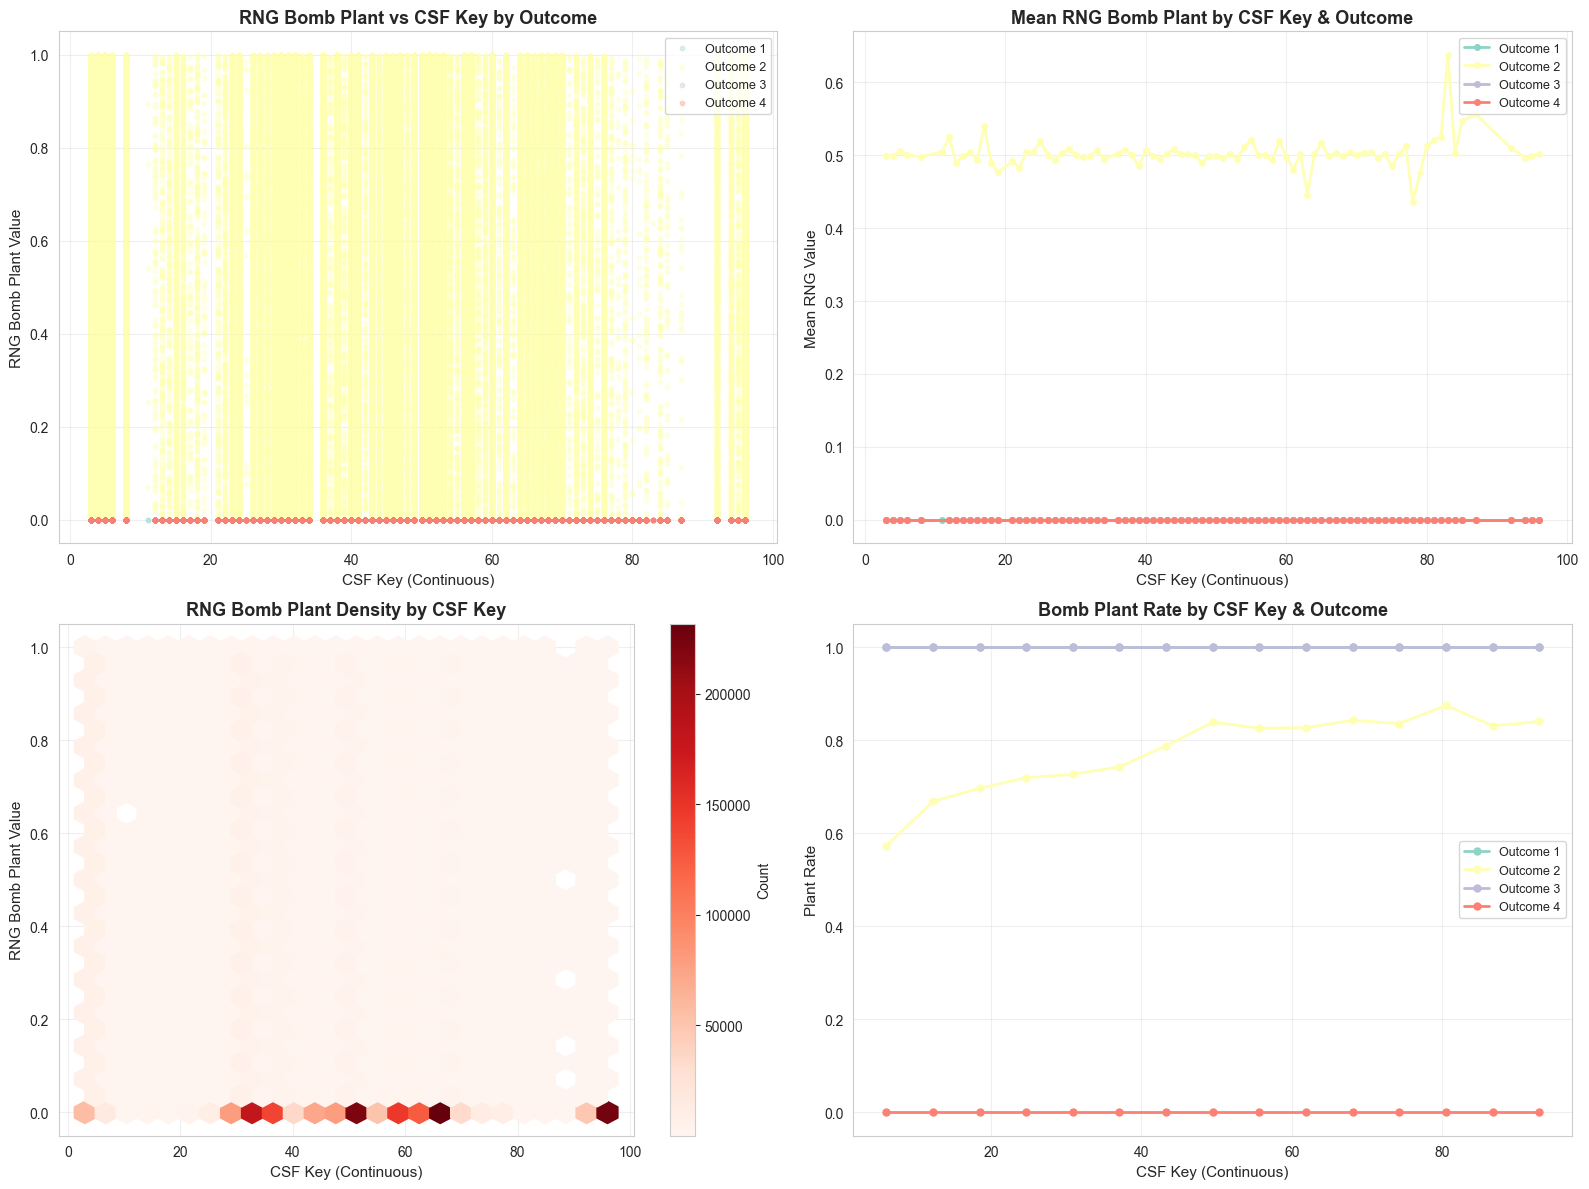

In [18]:
# Visualization: RNG Bomb Plant by Outcome & CSF (CONTINUOUS)
if df_rng is not None and 'rng_bombplant' in df_rng.columns and 'outcome_reason_code' in df_rng.columns and 'csf_key' in df_rng.columns:
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # 1. Scatter plot: CSF Key vs RNG Bomb Plant colored by outcome
    ax1 = axes[0, 0]
    for outcome in sorted(df_rng['outcome_reason_code'].unique()):
        subset = df_rng[df_rng['outcome_reason_code'] == outcome]
        ax1.scatter(subset['csf_key'], subset['rng_bombplant'], alpha=0.3, s=10, label=f'Outcome {outcome}')
    ax1.set_title('RNG Bomb Plant vs CSF Key by Outcome', fontsize=13, fontweight='bold')
    ax1.set_xlabel('CSF Key (Continuous)', fontsize=11)
    ax1.set_ylabel('RNG Bomb Plant Value', fontsize=11)
    ax1.legend(fontsize=9)
    ax1.grid(alpha=0.3)
    
    # 2. Line plot: Mean RNG by CSF key for each outcome
    ax2 = axes[0, 1]
    for outcome in sorted(df_rng['outcome_reason_code'].unique()):
        subset = df_rng[df_rng['outcome_reason_code'] == outcome]
        means = subset.groupby('csf_key')['rng_bombplant'].mean()
        ax2.plot(means.index, means.values, marker='o', label=f'Outcome {outcome}', linewidth=2, markersize=4)
    ax2.set_title('Mean RNG Bomb Plant by CSF Key & Outcome', fontsize=13, fontweight='bold')
    ax2.set_xlabel('CSF Key (Continuous)', fontsize=11)
    ax2.set_ylabel('Mean RNG Value', fontsize=11)
    ax2.legend(fontsize=9)
    ax2.grid(alpha=0.3)
    
    # 3. Hexbin for all data
    ax3 = axes[1, 0]
    hexbin = ax3.hexbin(df_rng['csf_key'], df_rng['rng_bombplant'], gridsize=25, cmap='Reds', mincnt=1)
    ax3.set_title('RNG Bomb Plant Density by CSF Key', fontsize=13, fontweight='bold')
    ax3.set_xlabel('CSF Key (Continuous)', fontsize=11)
    ax3.set_ylabel('RNG Bomb Plant Value', fontsize=11)
    plt.colorbar(hexbin, ax=ax3, label='Count')
    ax3.grid(alpha=0.3)
    
    # 4. Actual bomb plant rate if available
    ax4 = axes[1, 1]
    if 'outcome_bomb_planted' in df_rng.columns:
        # Calculate plant rate by CSF key bins
        df_rng['csf_key_binned'] = pd.cut(df_rng['csf_key'], bins=15)
        plant_rate_binned = df_rng.groupby(['csf_key_binned', 'outcome_reason_code'], observed=True)['outcome_bomb_planted'].mean().unstack(fill_value=0)
        bin_centers = [interval.mid for interval in plant_rate_binned.index]
        
        for outcome in plant_rate_binned.columns:
            ax4.plot(bin_centers, plant_rate_binned[outcome], marker='o', label=f'Outcome {outcome}', linewidth=2, markersize=5)
        
        ax4.set_title('Bomb Plant Rate by CSF Key & Outcome', fontsize=13, fontweight='bold')
        ax4.set_xlabel('CSF Key (Continuous)', fontsize=11)
        ax4.set_ylabel('Plant Rate', fontsize=11)
        ax4.legend(fontsize=9)
        ax4.grid(alpha=0.3)
        
        df_rng.drop('csf_key_binned', axis=1, inplace=True)
    else:
        ax4.text(0.5, 0.5, 'Bomb planted data not available\nin this export mode', 
                ha='center', va='center', fontsize=12, transform=ax4.transAxes)
        ax4.set_title('Bomb Plant Rate (Not Available)', fontsize=13)
        ax4.axis('off')
    
    plt.tight_layout()
    plt.show()
else:
    print("Visualization skipped: Required columns not available.")

### 3. Survivors RNG by Round Outcome & CSF Key

Analyzing rng_survivors_ct and rng_survivors_t grouped by outcome_reason_code and csf_key.

In [19]:
if df_rng is not None and 'rng_survivors_ct' in df_rng.columns and 'rng_survivors_t' in df_rng.columns:
    # CT Survivors RNG
    rng_surv_ct_by_outcome_csf = df_rng.groupby(['outcome_reason_code', 'csf_key'])['rng_survivors_ct'].agg([
        ('count', 'count'),
        ('mean', 'mean'),
        ('std', 'std'),
        ('median', 'median')
    ]).reset_index()
    
    # T Survivors RNG
    rng_surv_t_by_outcome_csf = df_rng.groupby(['outcome_reason_code', 'csf_key'])['rng_survivors_t'].agg([
        ('count', 'count'),
        ('mean', 'mean'),
        ('std', 'std'),
        ('median', 'median')
    ]).reset_index()
    
    print("="*80)
    print("RNG CT SURVIVORS DISTRIBUTION BY OUTCOME & CSF KEY")
    print("="*80)
    print(rng_surv_ct_by_outcome_csf.to_string(index=False))
    print("\n" + "="*80)
    print("RNG T SURVIVORS DISTRIBUTION BY OUTCOME & CSF KEY")
    print("="*80)
    print(rng_surv_t_by_outcome_csf.to_string(index=False))
    print("="*80)
    
    # Actual survivor counts if available
    if 'outcome_ct_survivors' in df_rng.columns and 'outcome_t_survivors' in df_rng.columns:
        actual_survivors = df_rng.groupby(['outcome_reason_code', 'csf_key']).agg({
            'outcome_ct_survivors': ['mean', 'std'],
            'outcome_t_survivors': ['mean', 'std']
        }).reset_index()
        print("\nACTUAL SURVIVOR COUNTS BY OUTCOME & CSF KEY")
        print("="*80)
        print(actual_survivors.to_string(index=False))
        print("="*80)
else:
    print("Skipping: Required columns not available.")

RNG CT SURVIVORS DISTRIBUTION BY OUTCOME & CSF KEY
 outcome_reason_code  csf_key  count  mean  std  median
                   1        3   1390   0.0  0.0     0.0
                   1        4  43117   0.0  0.0     0.0
                   1        5   4419   0.0  0.0     0.0
                   1        6   2781   0.0  0.0     0.0
                   1        8   4223   0.0  0.0     0.0
                   1       11      2   0.0  0.0     0.0
                   1       12     34   0.0  0.0     0.0
                   1       13     93   0.0  0.0     0.0
                   1       14     91   0.0  0.0     0.0
                   1       15    633   0.0  0.0     0.0
                   1       16    343   0.0  0.0     0.0
                   1       17     42   0.0  0.0     0.0
                   1       18    147   0.0  0.0     0.0
                   1       19     43   0.0  0.0     0.0
                   1       21    141   0.0  0.0     0.0
                   1       22    286   0.0  0.0     0

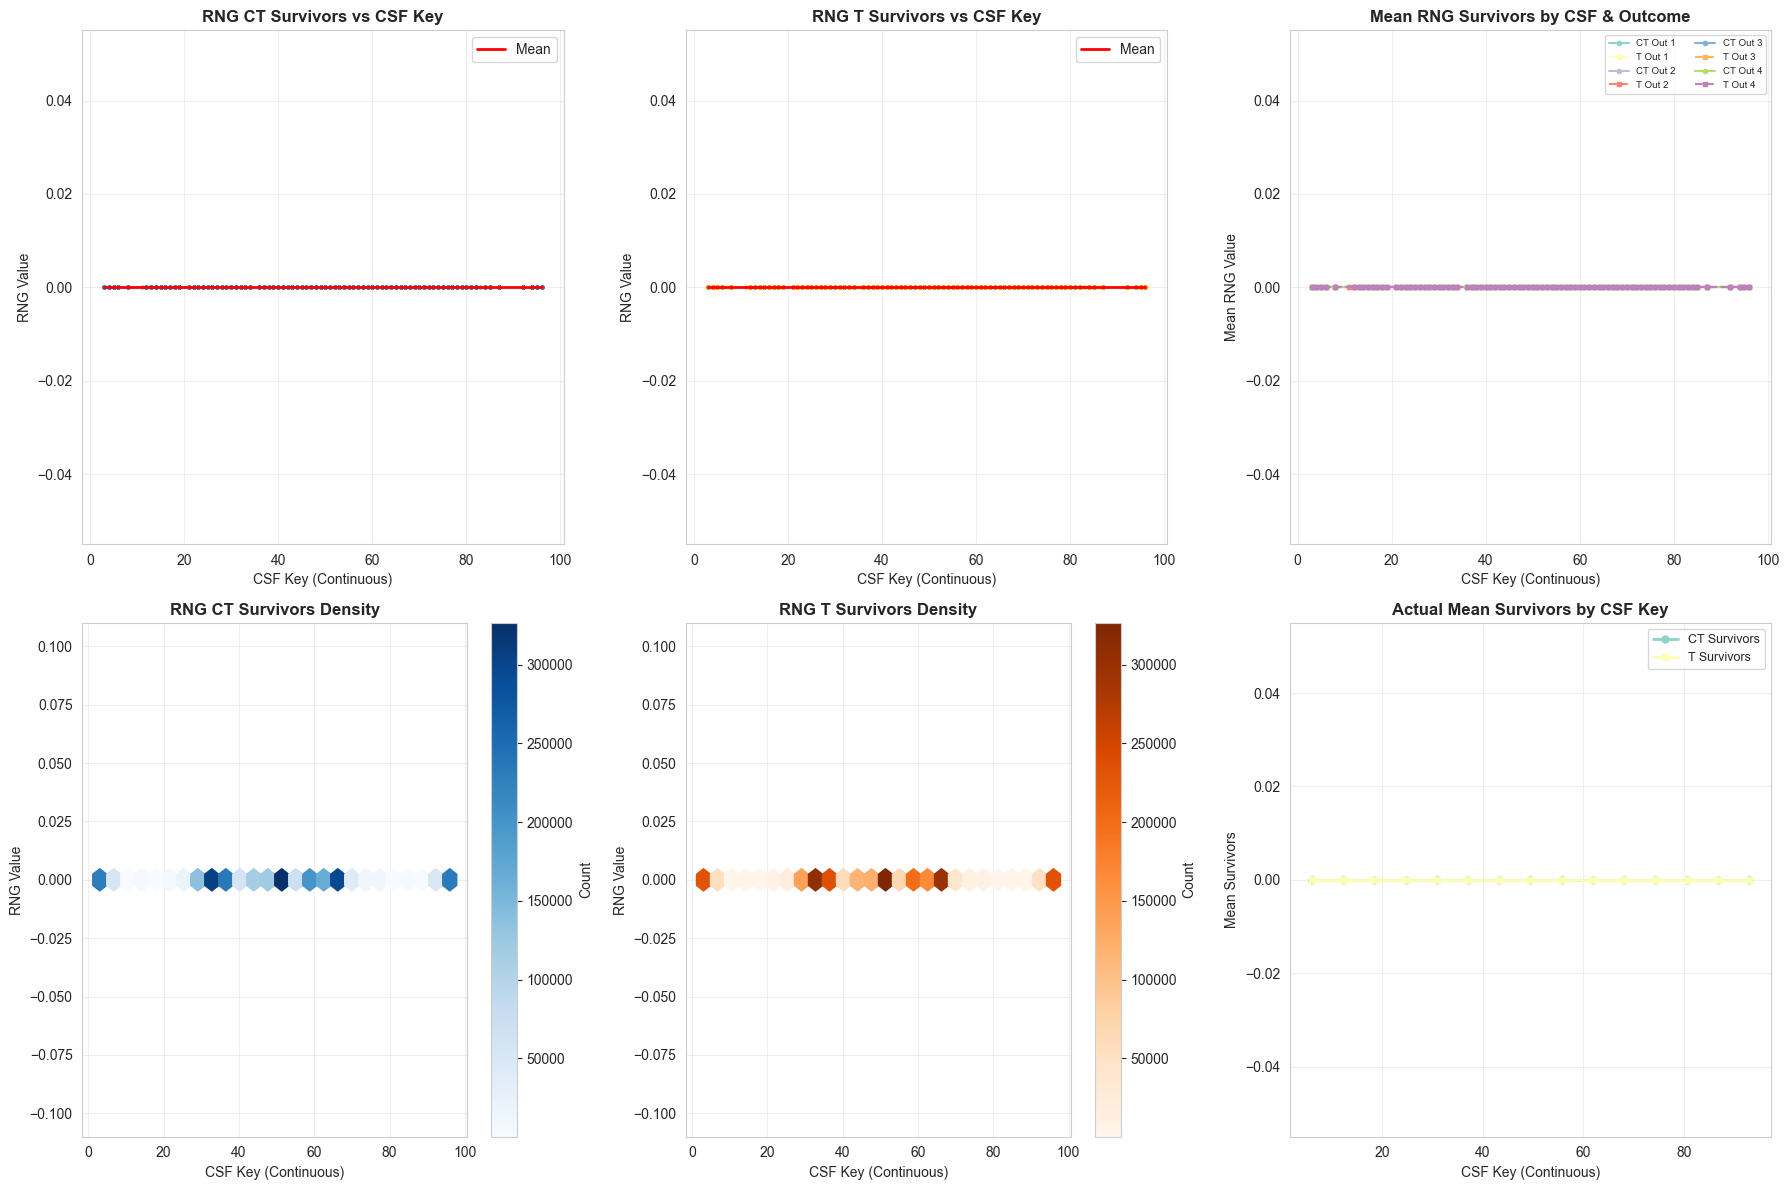

In [20]:
# Visualization: RNG Survivors by Outcome & CSF (CONTINUOUS)
if df_rng is not None and 'rng_survivors_ct' in df_rng.columns and 'rng_survivors_t' in df_rng.columns and 'csf_key' in df_rng.columns:
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    
    # 1. Scatter: CT Survivors RNG vs CSF Key
    ax1 = axes[0, 0]
    ax1.scatter(df_rng['csf_key'], df_rng['rng_survivors_ct'], alpha=0.1, s=5, color='steelblue')
    ct_means = df_rng.groupby('csf_key')['rng_survivors_ct'].mean()
    ax1.plot(ct_means.index, ct_means.values, color='red', linewidth=2, label='Mean')
    ax1.set_title('RNG CT Survivors vs CSF Key', fontsize=12, fontweight='bold')
    ax1.set_xlabel('CSF Key (Continuous)', fontsize=10)
    ax1.set_ylabel('RNG Value', fontsize=10)
    ax1.legend()
    ax1.grid(alpha=0.3)
    
    # 2. Scatter: T Survivors RNG vs CSF Key
    ax2 = axes[0, 1]
    ax2.scatter(df_rng['csf_key'], df_rng['rng_survivors_t'], alpha=0.1, s=5, color='darkorange')
    t_means = df_rng.groupby('csf_key')['rng_survivors_t'].mean()
    ax2.plot(t_means.index, t_means.values, color='red', linewidth=2, label='Mean')
    ax2.set_title('RNG T Survivors vs CSF Key', fontsize=12, fontweight='bold')
    ax2.set_xlabel('CSF Key (Continuous)', fontsize=10)
    ax2.set_ylabel('RNG Value', fontsize=10)
    ax2.legend()
    ax2.grid(alpha=0.3)
    
    # 3. Line plot: Mean RNG by outcome
    ax3 = axes[0, 2]
    for outcome in sorted(df_rng['outcome_reason_code'].unique())[:5]:  # Top 5 outcomes
        subset_ct = df_rng[df_rng['outcome_reason_code'] == outcome].groupby('csf_key')['rng_survivors_ct'].mean()
        subset_t = df_rng[df_rng['outcome_reason_code'] == outcome].groupby('csf_key')['rng_survivors_t'].mean()
        ax3.plot(subset_ct.index, subset_ct.values, marker='o', label=f'CT Out {outcome}', linestyle='-', markersize=3)
        ax3.plot(subset_t.index, subset_t.values, marker='s', label=f'T Out {outcome}', linestyle='--', markersize=3)
    ax3.set_title('Mean RNG Survivors by CSF & Outcome', fontsize=12, fontweight='bold')
    ax3.set_xlabel('CSF Key (Continuous)', fontsize=10)
    ax3.set_ylabel('Mean RNG Value', fontsize=10)
    ax3.legend(fontsize=7, ncol=2)
    ax3.grid(alpha=0.3)
    
    # 4. Hexbin CT survivors
    ax4 = axes[1, 0]
    hexbin_ct = ax4.hexbin(df_rng['csf_key'], df_rng['rng_survivors_ct'], gridsize=25, cmap='Blues', mincnt=1)
    ax4.set_title('RNG CT Survivors Density', fontsize=12, fontweight='bold')
    ax4.set_xlabel('CSF Key (Continuous)', fontsize=10)
    ax4.set_ylabel('RNG Value', fontsize=10)
    plt.colorbar(hexbin_ct, ax=ax4, label='Count')
    ax4.grid(alpha=0.3)
    
    # 5. Hexbin T survivors
    ax5 = axes[1, 1]
    hexbin_t = ax5.hexbin(df_rng['csf_key'], df_rng['rng_survivors_t'], gridsize=25, cmap='Oranges', mincnt=1)
    ax5.set_title('RNG T Survivors Density', fontsize=12, fontweight='bold')
    ax5.set_xlabel('CSF Key (Continuous)', fontsize=10)
    ax5.set_ylabel('RNG Value', fontsize=10)
    plt.colorbar(hexbin_t, ax=ax5, label='Count')
    ax5.grid(alpha=0.3)
    
    # 6. Actual survivors if available
    ax6 = axes[1, 2]
    if 'outcome_ct_survivors' in df_rng.columns and 'outcome_t_survivors' in df_rng.columns:
        # Bin CSF keys and calculate mean actual survivors
        df_rng['csf_key_binned'] = pd.cut(df_rng['csf_key'], bins=15)
        surv_by_csf = df_rng.groupby('csf_key_binned', observed=True).agg({
            'outcome_ct_survivors': 'mean',
            'outcome_t_survivors': 'mean'
        })
        bin_centers = [interval.mid for interval in surv_by_csf.index]
        
        ax6.plot(bin_centers, surv_by_csf['outcome_ct_survivors'], marker='o', label='CT Survivors', linewidth=2, markersize=5)
        ax6.plot(bin_centers, surv_by_csf['outcome_t_survivors'], marker='s', label='T Survivors', linewidth=2, markersize=5)
        ax6.set_xlabel('CSF Key (Continuous)', fontsize=10)
        ax6.set_ylabel('Mean Survivors', fontsize=10)
        ax6.set_title('Actual Mean Survivors by CSF Key', fontsize=12, fontweight='bold')
        ax6.legend(fontsize=9)
        ax6.grid(alpha=0.3)
        
        df_rng.drop('csf_key_binned', axis=1, inplace=True)
    else:
        ax6.text(0.5, 0.5, 'Actual survivor data\nnot available', 
                ha='center', va='center', fontsize=11, transform=ax6.transAxes)
        ax6.axis('off')
    
    plt.tight_layout()
    plt.show()
else:
    print("Visualization skipped: Required columns not available.")

### 4. CSF RNG Analysis

Analyzing the rng_csf values and their relationship to the calculated CSF and CSF keys.

In [21]:
if df_rng is not None and 'rng_csf' in df_rng.columns and 'csf' in df_rng.columns and 'csf_key' in df_rng.columns:
    # Distribution of RNG CSF
    print("="*80)
    print("RNG CSF OVERALL DISTRIBUTION")
    print("="*80)
    print(f"Count: {df_rng['rng_csf'].count()}")
    print(f"Mean: {df_rng['rng_csf'].mean():.6f}")
    print(f"Std: {df_rng['rng_csf'].std():.6f}")
    print(f"Min: {df_rng['rng_csf'].min():.6f}")
    print(f"25%: {df_rng['rng_csf'].quantile(0.25):.6f}")
    print(f"Median: {df_rng['rng_csf'].median():.6f}")
    print(f"75%: {df_rng['rng_csf'].quantile(0.75):.6f}")
    print(f"Max: {df_rng['rng_csf'].max():.6f}")
    print("="*80)
    
    # RNG CSF by CSF Key
    rng_csf_by_key = df_rng.groupby('csf_key')['rng_csf'].agg([
        ('count', 'count'),
        ('mean', 'mean'),
        ('std', 'std'),
        ('median', 'median')
    ]).reset_index()
    
    print("\nRNG CSF DISTRIBUTION BY CSF KEY")
    print("="*80)
    print(rng_csf_by_key.to_string(index=False))
    print("="*80)
    
    # Correlation between RNG CSF and actual CSF
    correlation = df_rng[['rng_csf', 'csf']].corr()
    print(f"\nCorrelation between rng_csf and csf: {correlation.iloc[0,1]:.6f}")
    print("="*80)
else:
    print("Skipping: Required columns not available.")

RNG CSF OVERALL DISTRIBUTION
Count: 2703459
Mean: 0.500251
Std: 0.288624
Min: 0.000001
25%: 0.250344
Median: 0.500357
75%: 0.750284
Max: 1.000000

RNG CSF DISTRIBUTION BY CSF KEY
 csf_key  count     mean      std   median
       3   7299 0.501407 0.287874 0.501634
       4 223277 0.500412 0.288679 0.500261
       5  21619 0.504284 0.286828 0.504824
       6  13199 0.503263 0.288447 0.504201
       8  19371 0.500128 0.289399 0.501435
      11      7 0.700608 0.218886 0.743151
      12    188 0.507049 0.275679 0.520765
      13    393 0.476123 0.282976 0.467049
      14    446 0.514278 0.291156 0.528857
      15   2380 0.507842 0.289126 0.511836
      16   1299 0.504331 0.292017 0.501157
      17    192 0.515284 0.295438 0.535481
      18    555 0.494576 0.291093 0.483410
      19    147 0.537456 0.290861 0.562642
      21    478 0.505670 0.295428 0.519086
      22   1052 0.492065 0.287574 0.484979
      23   4810 0.502393 0.290194 0.503810
      24   7314 0.497483 0.286662 0.497510
    

C:\Users\peter\AppData\Local\Temp\ipykernel_37528\3231555520.py:55: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\Users\peter\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\peter\AppData\Roaming\Python\Python313\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


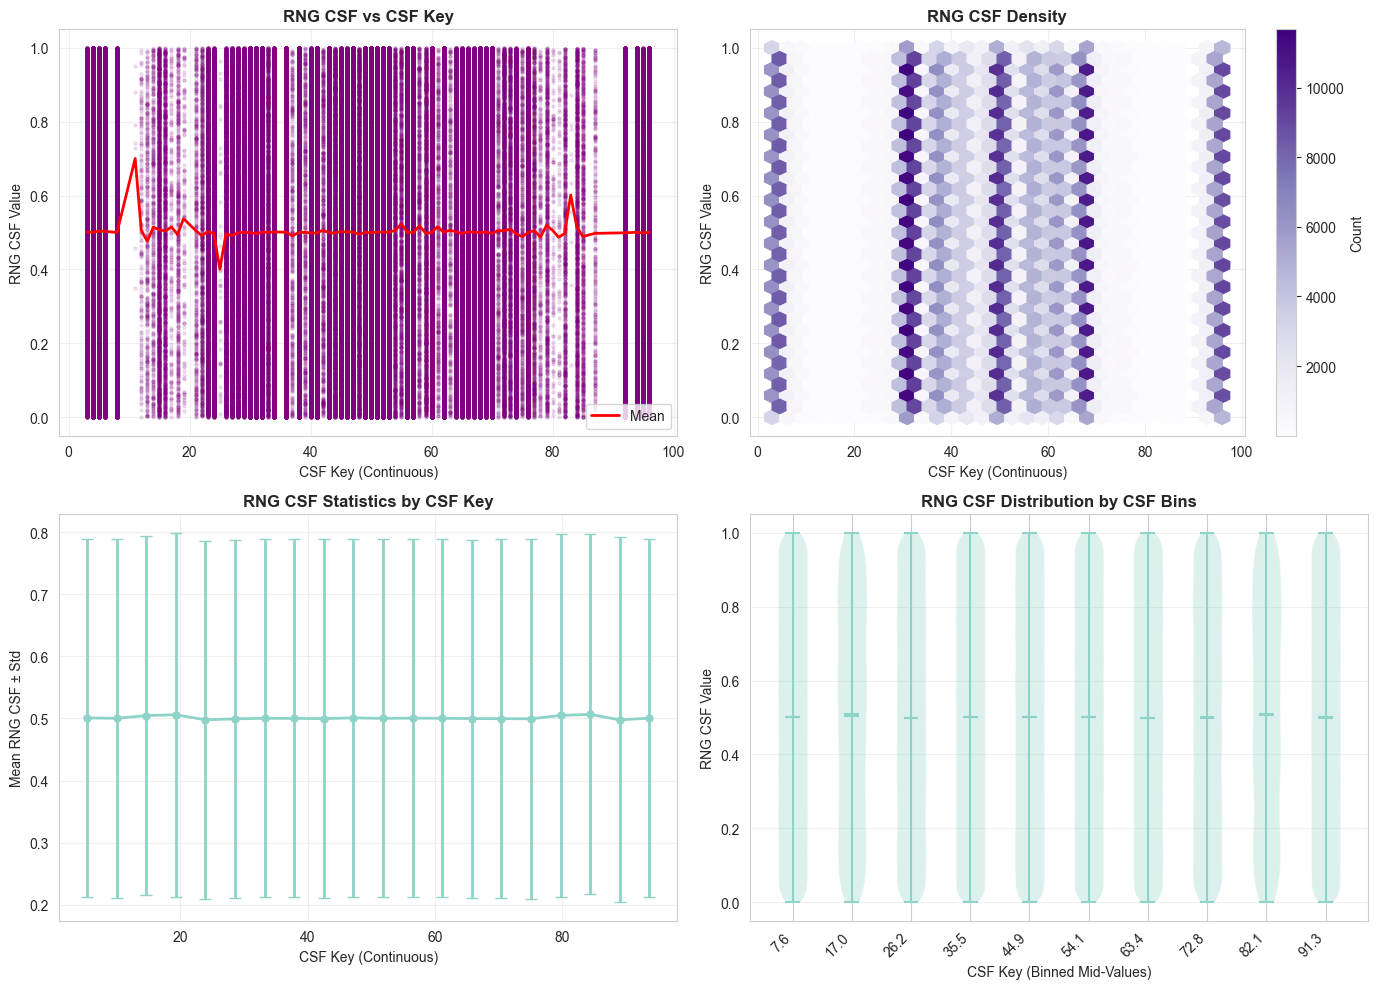

In [22]:
# Visualization: CSF RNG Analysis (CONTINUOUS)
if df_rng is not None and 'rng_csf' in df_rng.columns and 'csf_key' in df_rng.columns:
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    
    # 1. Scatter: CSF RNG vs CSF Key with mean trend
    ax1 = axes[0, 0]
    ax1.scatter(df_rng['csf_key'], df_rng['rng_csf'], alpha=0.1, s=5, color='purple')
    csf_means = df_rng.groupby('csf_key')['rng_csf'].mean()
    ax1.plot(csf_means.index, csf_means.values, color='red', linewidth=2, label='Mean')
    ax1.set_title('RNG CSF vs CSF Key', fontsize=12, fontweight='bold')
    ax1.set_xlabel('CSF Key (Continuous)', fontsize=10)
    ax1.set_ylabel('RNG CSF Value', fontsize=10)
    ax1.legend()
    ax1.grid(alpha=0.3)
    
    # 2. Hexbin density plot
    ax2 = axes[0, 1]
    hexbin_csf = ax2.hexbin(df_rng['csf_key'], df_rng['rng_csf'], gridsize=30, cmap='Purples', mincnt=1)
    ax2.set_title('RNG CSF Density', fontsize=12, fontweight='bold')
    ax2.set_xlabel('CSF Key (Continuous)', fontsize=10)
    ax2.set_ylabel('RNG CSF Value', fontsize=10)
    plt.colorbar(hexbin_csf, ax=ax2, label='Count')
    ax2.grid(alpha=0.3)
    
    # 3. Binned statistics: mean and std of RNG by CSF bins
    ax3 = axes[1, 0]
    df_rng['csf_key_binned'] = pd.cut(df_rng['csf_key'], bins=20)
    csf_stats = df_rng.groupby('csf_key_binned', observed=True)['rng_csf'].agg(['mean', 'std'])
    bin_centers = [interval.mid for interval in csf_stats.index]
    
    ax3.errorbar(bin_centers, csf_stats['mean'], yerr=csf_stats['std'], 
                marker='o', linestyle='-', capsize=4, linewidth=2, markersize=5)
    ax3.set_xlabel('CSF Key (Continuous)', fontsize=10)
    ax3.set_ylabel('Mean RNG CSF ± Std', fontsize=10)
    ax3.set_title('RNG CSF Statistics by CSF Key', fontsize=12, fontweight='bold')
    ax3.grid(alpha=0.3)
    
    # 4. Violin plot by binned CSF key
    ax4 = axes[1, 1]
    df_rng['csf_key_binned_violin'] = pd.cut(df_rng['csf_key'], bins=10)
    violin_data = [df_rng[df_rng['csf_key_binned_violin'] == cat]['rng_csf'].values 
                   for cat in sorted(df_rng['csf_key_binned_violin'].unique())]
    bin_labels = [f"{interval.mid:.1f}" for interval in sorted(df_rng['csf_key_binned_violin'].unique())]
    
    parts = ax4.violinplot(violin_data, positions=range(len(violin_data)), showmeans=True, showmedians=True)
    ax4.set_xticks(range(len(bin_labels)))
    ax4.set_xticklabels(bin_labels, rotation=45, ha='right')
    ax4.set_xlabel('CSF Key (Binned Mid-Values)', fontsize=10)
    ax4.set_ylabel('RNG CSF Value', fontsize=10)
    ax4.set_title('RNG CSF Distribution by CSF Bins', fontsize=12, fontweight='bold')
    ax4.grid(alpha=0.3, axis='y')
    
    df_rng.drop(['csf_key_binned', 'csf_key_binned_violin'], axis=1, inplace=True)
    
    plt.tight_layout()
    plt.show()
else:
    print("Visualization skipped: Required columns not available.")

### 5. Comprehensive RNG Correlation Matrix

Analyzing correlations between all RNG values and their corresponding outcome variables.

CORRELATION MATRIX: RNG VALUES & OUTCOMES
                       rng_csf  rng_round_outcome  rng_bombplant  rng_survivors_ct  rng_survivors_t       csf  outcome_reason_code  outcome_ct_wins  outcome_bomb_planted  outcome_ct_survivors  outcome_t_survivors
rng_csf               1.000000           0.000832       0.374992               NaN              NaN -0.000140            -0.595704        -0.664522              0.350761                   NaN                  NaN
rng_round_outcome     0.000832           1.000000       0.320980               NaN              NaN -0.000213             0.319180        -0.000324             -0.429322                   NaN                  NaN
rng_bombplant         0.374992           0.320980       1.000000               NaN              NaN -0.306257            -0.359325        -0.580820             -0.008839                   NaN                  NaN
rng_survivors_ct           NaN                NaN            NaN               NaN              NaN       

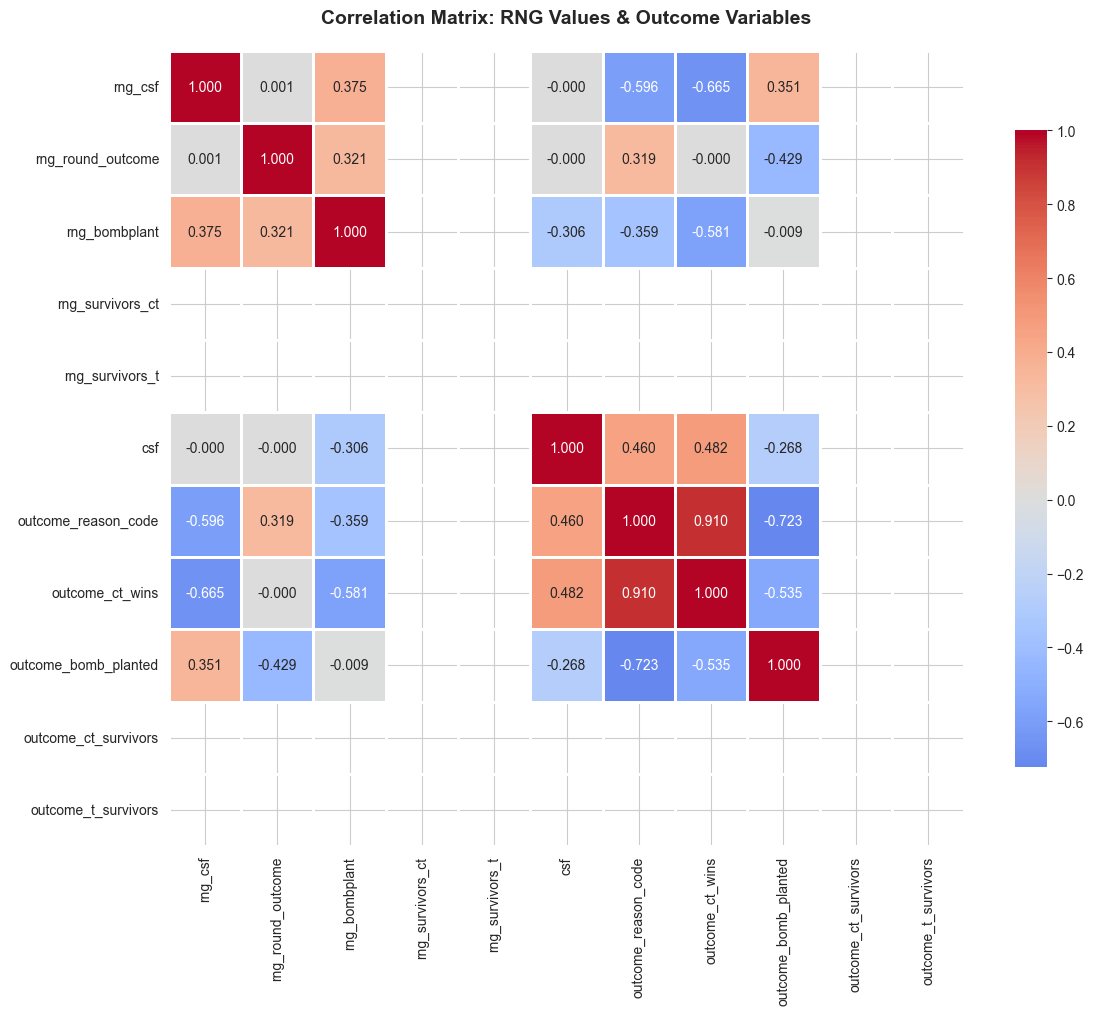

In [23]:
if df_rng is not None:
    # Select RNG and outcome columns for correlation
    corr_cols = []
    
    # Add RNG columns
    if 'rng_csf' in df_rng.columns:
        corr_cols.append('rng_csf')
    if 'rng_round_outcome' in df_rng.columns:
        corr_cols.append('rng_round_outcome')
    if 'rng_bombplant' in df_rng.columns:
        corr_cols.append('rng_bombplant')
    if 'rng_survivors_ct' in df_rng.columns:
        corr_cols.append('rng_survivors_ct')
    if 'rng_survivors_t' in df_rng.columns:
        corr_cols.append('rng_survivors_t')
    
    # Add outcome columns
    if 'csf' in df_rng.columns:
        corr_cols.append('csf')
    if 'outcome_reason_code' in df_rng.columns:
        corr_cols.append('outcome_reason_code')
    if 'outcome_ct_wins' in df_rng.columns:
        corr_cols.append('outcome_ct_wins')
    if 'outcome_bomb_planted' in df_rng.columns:
        corr_cols.append('outcome_bomb_planted')
    if 'outcome_ct_survivors' in df_rng.columns:
        corr_cols.append('outcome_ct_survivors')
    if 'outcome_t_survivors' in df_rng.columns:
        corr_cols.append('outcome_t_survivors')
    
    if len(corr_cols) > 1:
        # Calculate correlation matrix
        corr_matrix = df_rng[corr_cols].corr()
        
        print("="*80)
        print("CORRELATION MATRIX: RNG VALUES & OUTCOMES")
        print("="*80)
        print(corr_matrix.to_string())
        print("="*80)
        
        # Visualize correlation matrix
        plt.figure(figsize=(12, 10))
        sns.heatmap(corr_matrix, annot=True, fmt='.3f', cmap='coolwarm', center=0,
                    square=True, linewidths=1, cbar_kws={"shrink": 0.8})
        plt.title('Correlation Matrix: RNG Values & Outcome Variables', fontsize=14, fontweight='bold', pad=20)
        plt.tight_layout()
        plt.show()
    else:
        print("Not enough columns available for correlation analysis.")
else:
    print("Skipping: RNG dataframe not available.")

### 6. RNG Distribution Summary Statistics

Comprehensive statistical summary of all RNG values.

RNG VALUES SUMMARY STATISTICS
            rng_csf  rng_round_outcome  rng_bombplant  rng_survivors_ct  rng_survivors_t
count  2.703459e+06       2.703459e+06   2.703459e+06         2703459.0        2703459.0
mean   5.002508e-01       4.998383e+01   1.737455e-01               0.0              0.0
std    2.886245e-01       2.887386e+01   2.926487e-01               0.0              0.0
min    1.000000e-06       1.700000e-05   0.000000e+00               0.0              0.0
25%    2.503445e-01       2.498275e+01   0.000000e+00               0.0              0.0
50%    5.003570e-01       4.998647e+01   0.000000e+00               0.0              0.0
75%    7.502840e-01       7.498109e+01   2.807400e-01               0.0              0.0
max    1.000000e+00       9.999993e+01   9.999980e-01               0.0              0.0

UNIFORMITY TEST (Expected: mean≈0.5, std≈0.289)
rng_csf                   | Mean: 0.500251 | Std: 0.288624
rng_round_outcome         | Mean: 49.983828 | Std: 28.873861


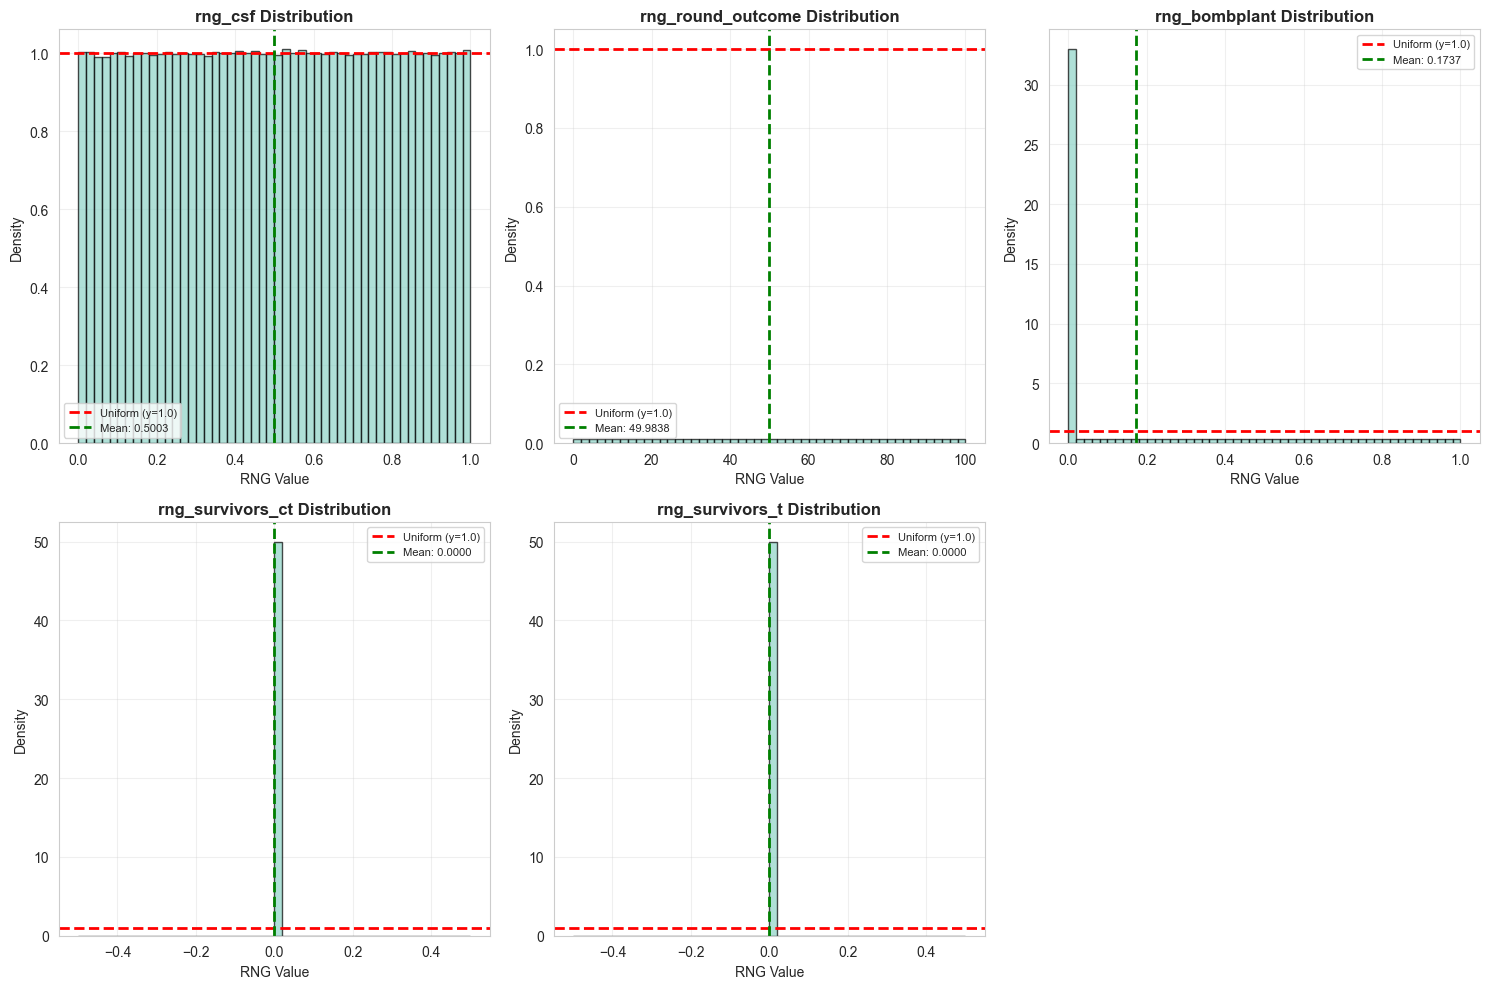

In [24]:
if df_rng is not None:
    rng_columns = [col for col in df_rng.columns if col.startswith('rng_')]
    
    if len(rng_columns) > 0:
        print("="*80)
        print("RNG VALUES SUMMARY STATISTICS")
        print("="*80)
        rng_summary = df_rng[rng_columns].describe()
        print(rng_summary.to_string())
        print("="*80)
        
        # Test for uniformity (RNG values should be uniform [0,1])
        print("\nUNIFORMITY TEST (Expected: mean≈0.5, std≈0.289)")
        print("="*80)
        for col in rng_columns:
            mean_val = df_rng[col].mean()
            std_val = df_rng[col].std()
            # Theoretical std for uniform [0,1] is 1/sqrt(12) ≈ 0.289
            print(f"{col:25s} | Mean: {mean_val:.6f} | Std: {std_val:.6f}")
        print("="*80)
        
        # Visualize all RNG distributions
        n_rng = len(rng_columns)
        n_cols = 3
        n_rows = (n_rng + n_cols - 1) // n_cols
        
        fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
        axes = axes.flatten() if n_rng > 1 else [axes]
        
        for idx, col in enumerate(rng_columns):
            ax = axes[idx]
            ax.hist(df_rng[col], bins=50, alpha=0.7, edgecolor='black', density=True)
            ax.axhline(y=1.0, color='red', linestyle='--', linewidth=2, label='Uniform (y=1.0)')
            ax.axvline(df_rng[col].mean(), color='green', linestyle='--', linewidth=2, 
                      label=f'Mean: {df_rng[col].mean():.4f}')
            ax.set_title(f'{col} Distribution', fontsize=12, fontweight='bold')
            ax.set_xlabel('RNG Value', fontsize=10)
            ax.set_ylabel('Density', fontsize=10)
            ax.legend(fontsize=8)
            ax.grid(alpha=0.3)
        
        # Hide unused subplots
        for idx in range(n_rng, len(axes)):
            axes[idx].axis('off')
        
        plt.tight_layout()
        plt.show()
    else:
        print("No RNG columns found.")
else:
    print("Skipping: RNG dataframe not available.")